# Proyek Kecerdasan Buatan

1. Dicky Anugrah G6401221027
2. Abyan Fidriyansyah G6401221043
3. Ainil Mardhatilah G6401221045
4. Pandu Persada Tanjung G6401221097

## Import Semua Packages/Library yang Digunakan

In [1]:
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Link dataset: [Kaggle](https://www.kaggle.com/datasets/chaitanyagopidesi/smart-agriculture-dataset?select=cropdata_updated.csv)

In [2]:
#Dataset kaggle
file_id = "1wpCxyYgsWoF9EAdJFxserh4TdwRYPKEf"
url = f"https://drive.google.com/uc?id={file_id}"

# Download train.csv
gdown.download(url, 'train.csv', quiet=False)

# Membaca dataset
kaggle = pd.read_csv("train.csv")

Downloading...
From: https://drive.google.com/uc?id=1wpCxyYgsWoF9EAdJFxserh4TdwRYPKEf
To: /content/train.csv
100%|██████████| 786k/786k [00:00<00:00, 95.6MB/s]


In [3]:
kaggle.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [6]:
import numpy as np
# Mengubah nama kolom ke bahasa Indonesia
kaggle.rename(columns={
    'crop ID': 'JenisTanaman',
    'soil_type': 'Tipe Tanah',
    'Seedling Stage': 'Tahap Semai',
    'MOI': 'KelembapanTanah',
    'temp': 'Suhu',
    'humidity': 'Kelembapan',
    'result': 'ButuhIrigasi'
}, inplace=True)

# Menambahkan kolom 'CurahHujan' dengan nilai acak untuk contoh
np.random.seed(42)  # Menjaga hasil acak tetap sama
kaggle['CurahHujan'] = np.random.uniform(50, 200, size=len(kaggle))  # Nilai curah hujan antara 50 dan 200 mm

# Menampilkan beberapa baris pertama setelah perubahan
kaggle.head()

,JenisTanaman,Tipe Tanah,Tahap Semai,KelembapanTanah,Suhu,Kelembapan,ButuhIrigasi,CurahHujan
0,Wheat,Black Soil,Germination,1,25,80.0,1,106.181018
1,Wheat,Black Soil,Germination,2,26,77.0,1,192.607146
2,Wheat,Black Soil,Germination,3,27,74.0,1,159.799091
3,Wheat,Black Soil,Germination,4,28,71.0,1,139.798773
4,Wheat,Black Soil,Germination,5,29,68.0,1,73.402796


In [7]:
# Cek nilai unik di kolom 'JenisTanaman'
print(kaggle['JenisTanaman'].unique())

# Misalkan dataset sudah ada dan bernama 'dataset'
# Encoding 'JenisTanaman'
jenis_tanaman_mapping = {
    'wheat': 1,
    'chilli': 2,
    'potato': 3,
    'carrot': 4,
    'tomato': 5
}

# Mengecek apakah ada kesalahan penulisan atau perbedaan format
kaggle['JenisTanaman'] = kaggle['JenisTanaman'].str.strip().str.lower()

# Menggunakan mapping jika nilai valid
kaggle['JenisTanaman'] = kaggle['JenisTanaman'].map(jenis_tanaman_mapping)

# Cek hasil setelah encoding
print(kaggle[['JenisTanaman']].head())

# Encoding 'TipeTanah'
tipe_tanah_mapping = {
    'Clay Soil': 1,
    'Sandy Soil': 2,
    'Red Soil': 3,
    'Loam Soil': 4,
    'Black Soil': 5
}

kaggle['Tipe Tanah'] = kaggle['Tipe Tanah'].map(tipe_tanah_mapping)

# Encoding 'TahapSemai'
tahap_semai_mapping = {
    'Flowering': 1,
    'Seedling Stage': 2,
    'Vegetative Growth / Root or Tuber Development': 3,
    'Germination': 4,
    'Pollination': 5
}

kaggle['Tahap Semai'] = kaggle['Tahap Semai'].map(tahap_semai_mapping)

# Cek hasil encoding
kaggle[['JenisTanaman', 'Tipe Tanah', 'Tahap Semai']].head()

kaggle.head()


['Wheat' 'Potato' 'Carrot' 'Tomato' 'Chilli']
   JenisTanaman
0             1
1             1
2             1
3             1
4             1


,JenisTanaman,Tipe Tanah,Tahap Semai,KelembapanTanah,Suhu,Kelembapan,ButuhIrigasi,CurahHujan
0,1,5.0,4.0,1,25,80.0,1,106.181018
1,1,5.0,4.0,2,26,77.0,1,192.607146
2,1,5.0,4.0,3,27,74.0,1,159.799091
3,1,5.0,4.0,4,28,71.0,1,139.798773
4,1,5.0,4.0,5,29,68.0,1,73.402796


In [ ]:
# # Sample 1000 baris secara acak
# dataset_1000 = kaggle.sample(n=1000, random_state=42)

# # Sample 500 baris secara acak
# dataset_500 = kaggle.sample(n=500, random_state=42)

# # Menyimpan dataset sampel ke file CSV
# dataset_1000.to_csv('dataset_1000_encoded.csv', index=False)
# dataset_500.to_csv('dataset_500_encoded.csv', index=False)

# # Mendownload file CSV ke lokal (Google Colab)
# from google.colab import files
# files.download('dataset_1000_encoded.csv')
# files.download('dataset_500_encoded.csv')


### Preprocess Data Training

In [ ]:
# ID file train dari Google Drive
#https://drive.google.com/file/d/1fbmzYOaf8rbkPgB8ddsGwH7HWebQTCF9/view?usp=sharing
file_id = "1fbmzYOaf8rbkPgB8ddsGwH7HWebQTCF9"
url = f"https://drive.google.com/uc?id={file_id}"

# Download train.csv
gdown.download(url, 'train.csv', quiet=False)

# Membaca dataset
dataset = pd.read_csv("train.csv")

Downloading...
From: https://drive.google.com/uc?id=1fbmzYOaf8rbkPgB8ddsGwH7HWebQTCF9
To: /content/train.csv
100%|██████████| 40.7k/40.7k [00:00<00:00, 51.7MB/s]


### Assessing Data

Melihat 5 baris teratas pada dataset

In [ ]:
dataset.head()

,JenisTanaman,Tipe Tanah,Tahap Semai,KelembapanTanah,Suhu,Kelembapan,ButuhIrigasi,CurahHujan
0,2,5.0,3.0,70,42,29.0,1,150.587008
1,4,1.0,2.0,41,22,82.0,0,148.339093
2,1,5.0,2.0,19,18,86.0,0,177.586179
3,1,NaN,5.0,52,14,90.0,0,181.891933
4,1,5.0,2.0,50,42,29.0,2,91.796970


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   JenisTanaman     1000 non-null   int64  
 1   Tipe Tanah       880 non-null    float64
 2   Tahap Semai      857 non-null    float64
 3   KelembapanTanah  1000 non-null   int64  
 4   Suhu             1000 non-null   int64  
 5   Kelembapan       1000 non-null   float64
 6   ButuhIrigasi     1000 non-null   int64  
 7   CurahHujan       1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [ ]:
print(dataset.dtypes)

JenisTanaman         int64
Tipe Tanah         float64
Tahap Semai        float64
KelembapanTanah      int64
Suhu                 int64
Kelembapan         float64
ButuhIrigasi         int64
CurahHujan         float64
dtype: object


In [ ]:
#memeriksa missing value
dataset.isna().sum()

,0
JenisTanaman,0
Tipe Tanah,120
Tahap Semai,143
KelembapanTanah,0
Suhu,0
Kelembapan,0
ButuhIrigasi,0
CurahHujan,0


In [ ]:
# Menghapus baris dengan NaN pada kolom tertentu ('Tipe Tanah' dan 'Tahap Semai')
dataset_cleaned = dataset.dropna(subset=['Tipe Tanah', 'Tahap Semai'])

# Memeriksa missing value setelah dibersihkan
print("\nMissing values setelah dibersihkan:")
print(dataset_cleaned.isna().sum())



Missing values setelah dibersihkan:
JenisTanaman       0
Tipe Tanah         0
Tahap Semai        0
KelembapanTanah    0
Suhu               0
Kelembapan         0
ButuhIrigasi       0
CurahHujan         0
dtype: int64


In [ ]:
#memeriksa data duplikat
dataset_cleaned.duplicated().sum()

0

In [ ]:
#Memeriksan parameter statistik secara singkat
dataset_cleaned.describe()

,JenisTanaman,Tipe Tanah,Tahap Semai,KelembapanTanah,Suhu,Kelembapan,ButuhIrigasi,CurahHujan
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,2.981771,2.671875,2.798177,43.708333,28.71875,63.650000,0.511719,125.510814
std,1.437868,1.393462,1.340239,26.955869,9.61754,22.581308,0.623209,43.964173
min,1.000000,1.000000,1.000000,1.000000,13.00000,15.000000,0.000000,50.135875
25%,2.000000,1.000000,2.000000,22.000000,20.00000,44.000000,0.000000,87.200282
50%,3.000000,2.000000,3.000000,40.500000,29.00000,68.000000,0.000000,125.255161
75%,4.000000,4.000000,4.000000,63.000000,37.00000,84.000000,1.000000,164.892589
max,5.000000,5.000000,5.000000,100.000000,46.00000,91.000000,2.000000,199.950981


## Exploratory Data Analysis (EDA)

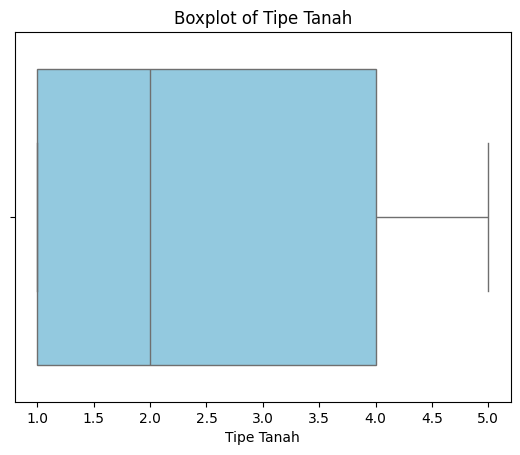

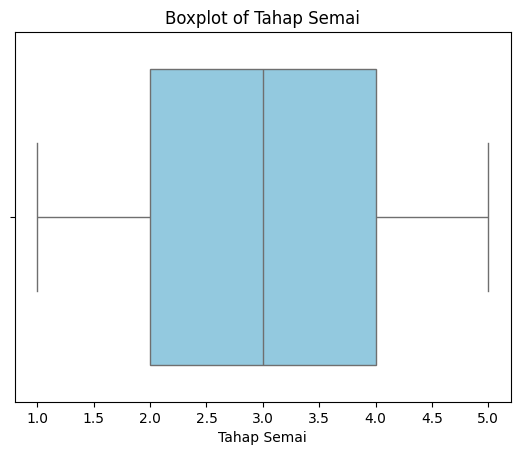

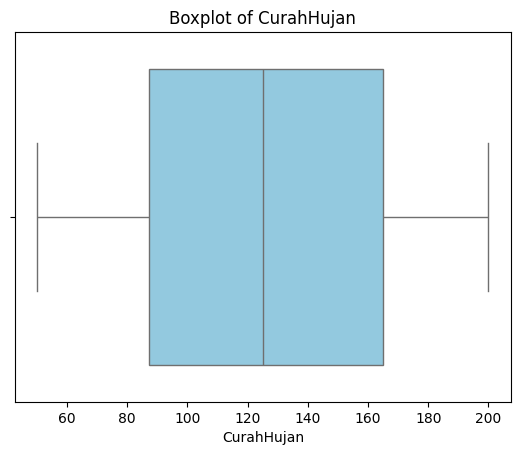

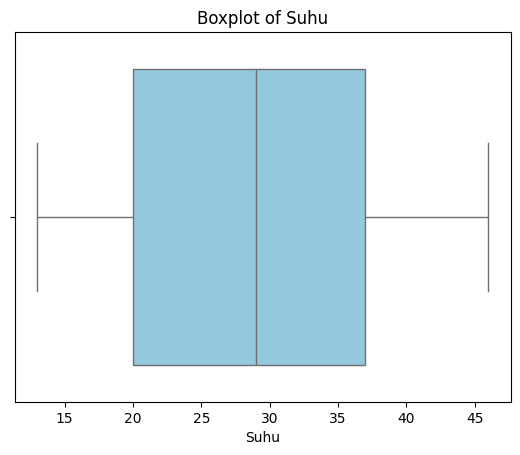

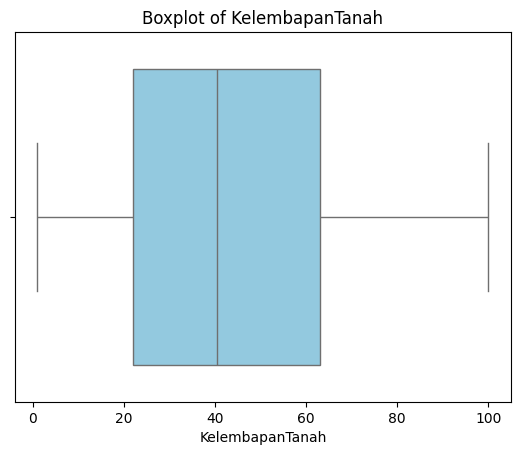

In [ ]:
#Cek outlier data numerik
numeric_columns = ['Tipe Tanah', 'Tahap Semai', 'CurahHujan', 'Suhu', 'KelembapanTanah']
for col in numeric_columns:
    sns.boxplot(x=dataset_cleaned[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.show()


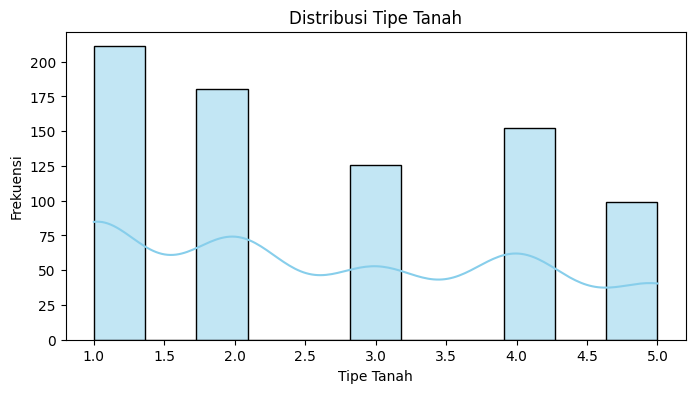

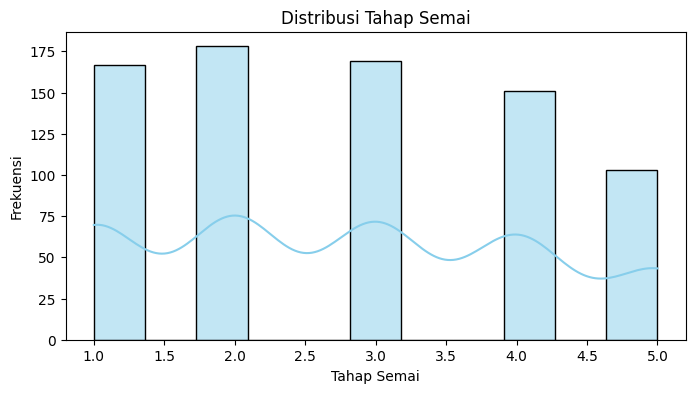

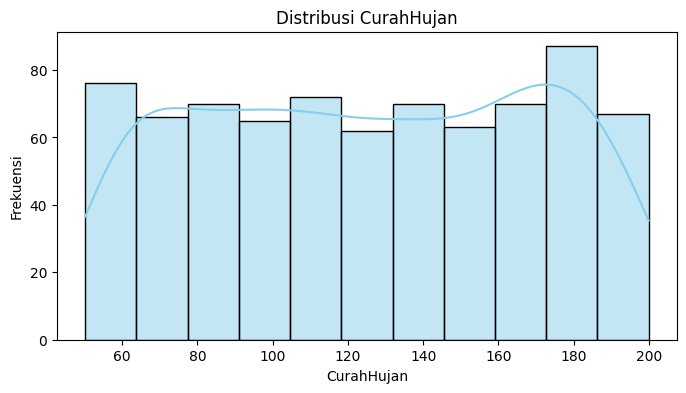

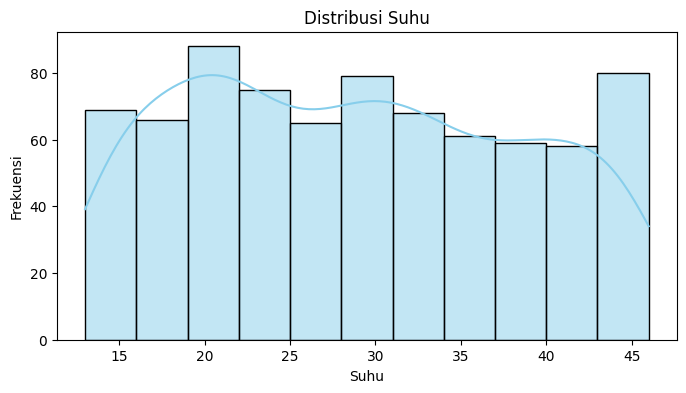

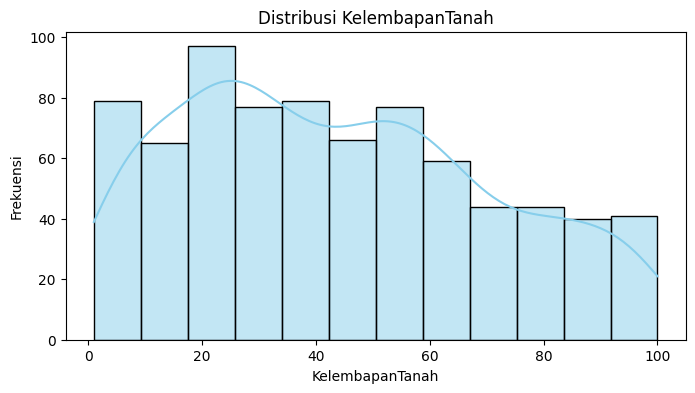

In [ ]:
# Distribusi numerik
numeric_columns = ['Tipe Tanah', 'Tahap Semai', 'CurahHujan', 'Suhu', 'KelembapanTanah']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset_cleaned[col], kde=True, color='skyblue')
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


ButuhIrigasi
0    0.557292
1    0.373698
2    0.069010
Name: proportion, dtype: float64


<ipython-input-12-74b2b639c385>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset_cleaned['ButuhIrigasi'], palette='pastel')


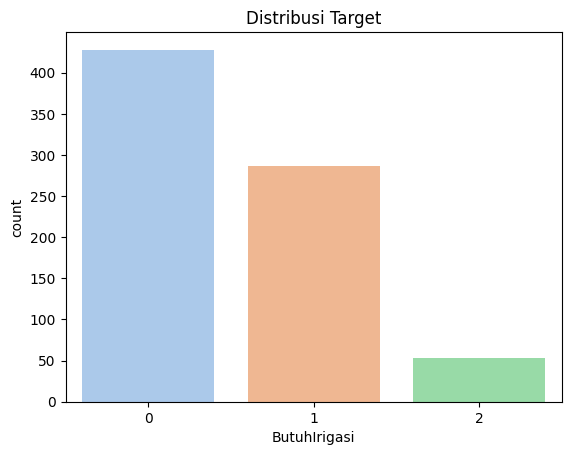

In [ ]:
#Cek distribusi dataset
print(dataset_cleaned['ButuhIrigasi'].value_counts(normalize=True))
sns.countplot(x=dataset_cleaned['ButuhIrigasi'], palette='pastel')
plt.title("Distribusi Target")
plt.show()


ButuhIrigasi
0    0.598601
1    0.401399
Name: proportion, dtype: float64


<ipython-input-13-c8d9e9a17100>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset_filtered['ButuhIrigasi'], palette='pastel')


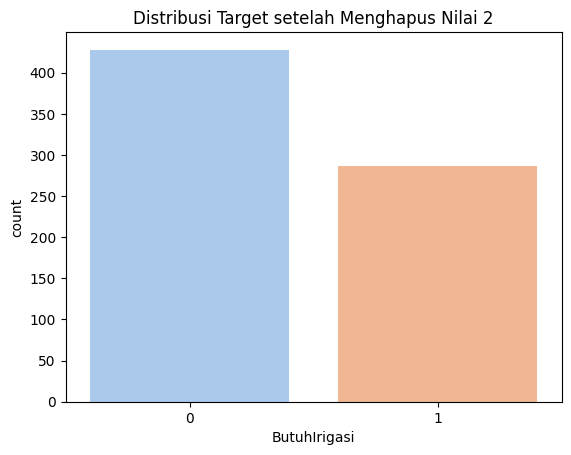

In [ ]:
# Menghapus baris dengan nilai 2 pada kolom 'ButuhIrigasi'
dataset_filtered = dataset_cleaned[dataset_cleaned['ButuhIrigasi'] != 2]

# Cek distribusi dataset setelah menghapus nilai 2
print(dataset_filtered['ButuhIrigasi'].value_counts(normalize=True))

# Visualisasi distribusi target setelah menghapus nilai 2
sns.countplot(x=dataset_filtered['ButuhIrigasi'], palette='pastel')
plt.title("Distribusi Target setelah Menghapus Nilai 2")
plt.show()

In [ ]:
dataset_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 998
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   JenisTanaman     715 non-null    int64  
 1   Tipe Tanah       715 non-null    float64
 2   Tahap Semai      715 non-null    float64
 3   KelembapanTanah  715 non-null    int64  
 4   Suhu             715 non-null    int64  
 5   Kelembapan       715 non-null    float64
 6   ButuhIrigasi     715 non-null    int64  
 7   CurahHujan       715 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 50.3 KB


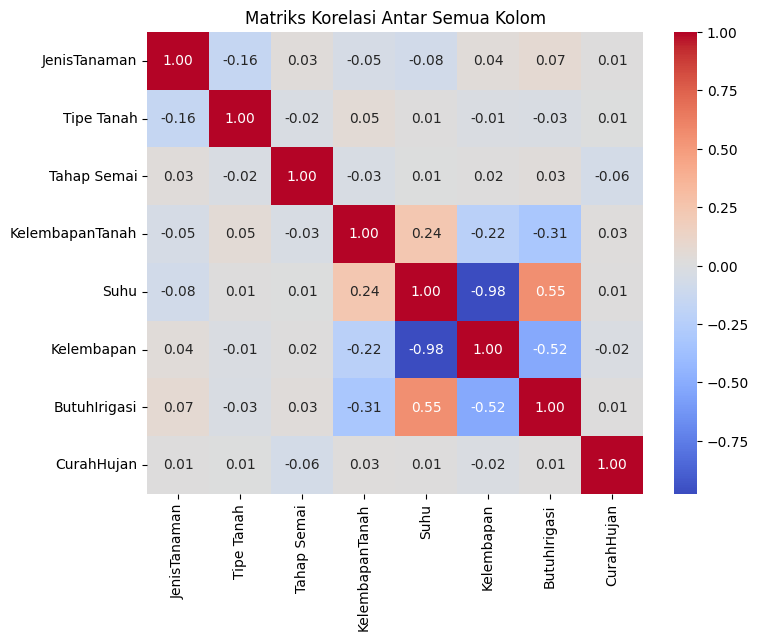

In [ ]:
# Menghitung korelasi antar kolom
correlation_matrix = dataset_filtered.corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi Antar Semua Kolom")
plt.show()


In [ ]:
# Korelasi dengan ButuhIrigasi
correlation_with_target = correlation_matrix['ButuhIrigasi'].sort_values(ascending=False)
print("Korelasi dengan ButuhIrigasi:")
print(correlation_with_target)


Korelasi dengan ButuhIrigasi:
ButuhIrigasi       1.000000
Suhu               0.552962
JenisTanaman       0.071857
Tahap Semai        0.031658
CurahHujan         0.014861
Tipe Tanah        -0.026463
KelembapanTanah   -0.314011
Kelembapan        -0.518913
Name: ButuhIrigasi, dtype: float64


## Training Data

Accuracy on Testing Data: 95.10%

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        83
           1       0.96      0.92      0.94        60

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



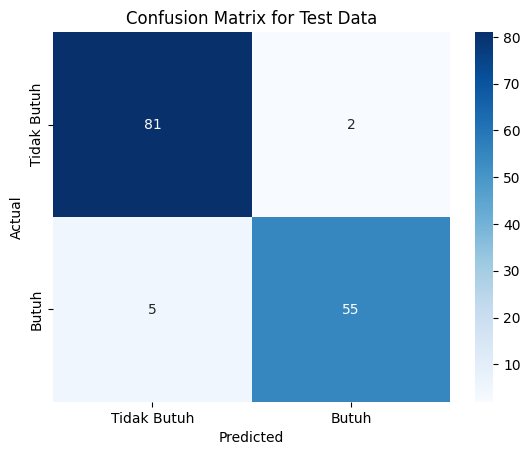

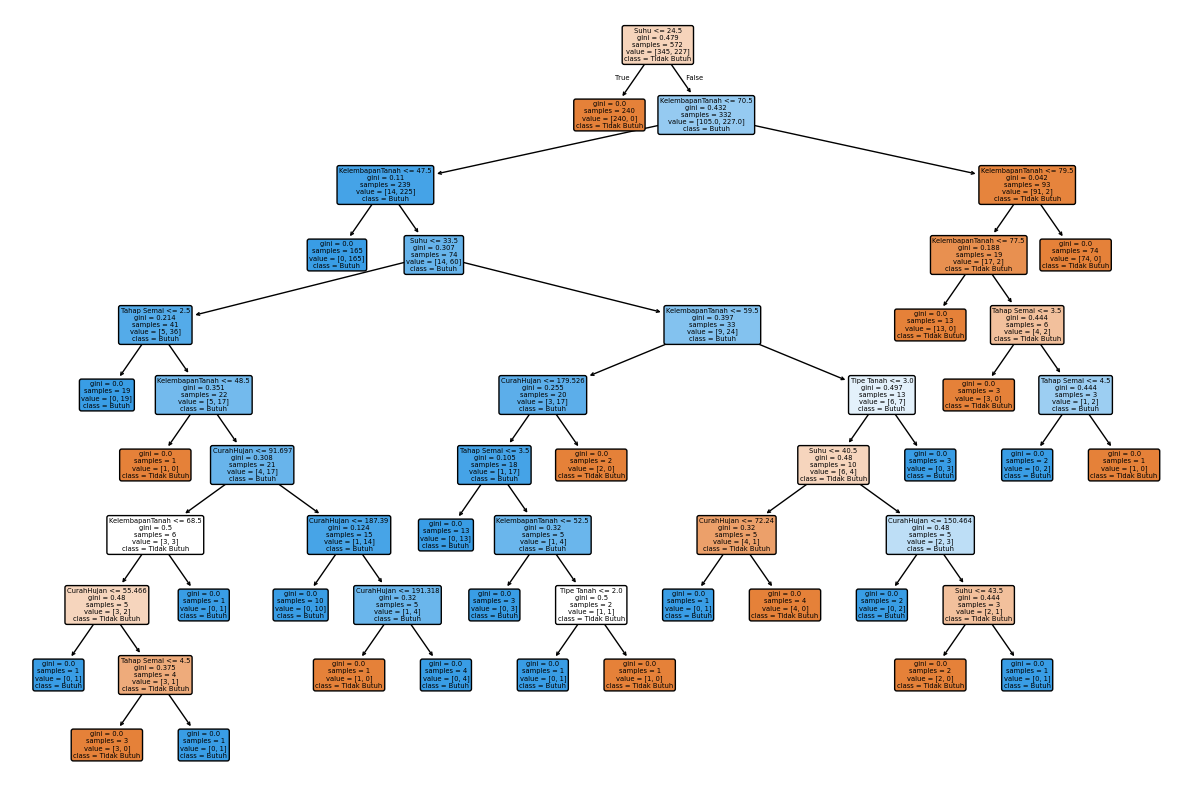

In [ ]:
# Pisahkan Fitur dan Target
X = dataset_filtered[['Tipe Tanah', 'Tahap Semai', 'CurahHujan', 'Suhu', 'KelembapanTanah']]  # Fitur
y = dataset_filtered['ButuhIrigasi']  # Target

# Split Data untuk Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan Latih Model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_test = model.predict(X_test)  # Prediksi pada data testing

# Evaluasi Akurasi untuk Testing Data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on Testing Data: {accuracy_test * 100:.2f}%")

# Classification Report untuk Test Data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

# Visualisasi Confusion Matrix untuk Test Data
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Butuh', 'Butuh'], yticklabels=['Tidak Butuh', 'Butuh'])
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualisasi Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Tidak Butuh', 'Butuh'], filled=True, rounded=True)
plt.show()

## Data Testing

In [ ]:
# ID file train dari Google Drive
# https://drive.google.com/file/d/1CpthnAG5HzT3RVRhcqRM72-iazlq3BDh/view?usp=sharing
# Step 1: Download train.csv
file_id = "1CpthnAG5HzT3RVRhcqRM72-iazlq3BDh"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, 'train.csv', quiet=False)

# Load Dataset
dataset = pd.read_csv('train.csv')

dataset.info()


Downloading...
From: https://drive.google.com/uc?id=1CpthnAG5HzT3RVRhcqRM72-iazlq3BDh
To: /content/train.csv
100%|██████████| 20.4k/20.4k [00:00<00:00, 26.2MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   JenisTanaman     500 non-null    int64  
 1   Tipe Tanah       445 non-null    float64
 2   Tahap Semai      444 non-null    float64
 3   KelembapanTanah  500 non-null    int64  
 4   Suhu             500 non-null    int64  
 5   Kelembapan       500 non-null    float64
 6   ButuhIrigasi     500 non-null    int64  
 7   CurahHujan       500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
dataset.isna().sum()

,0
JenisTanaman,0
Tipe Tanah,55
Tahap Semai,56
KelembapanTanah,0
Suhu,0
Kelembapan,0
ButuhIrigasi,0
CurahHujan,0


In [ ]:
# Menghapus baris dengan NaN pada kolom tertentu ('Tipe Tanah' dan 'Tahap Semai')
dataset_bersih = dataset.dropna(subset=['Tipe Tanah', 'Tahap Semai'])

# Memeriksa missing value setelah dibersihkan
print("\nMissing values setelah dibersihkan:")
print(dataset_bersih.isna().sum())



Missing values setelah dibersihkan:
JenisTanaman       0
Tipe Tanah         0
Tahap Semai        0
KelembapanTanah    0
Suhu               0
Kelembapan         0
ButuhIrigasi       0
CurahHujan         0
dtype: int64


In [ ]:
dataset_bersih.duplicated().sum()

0

<ipython-input-22-780c14e8ea92>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_filter = dataset_bersih[dataset_cleaned['ButuhIrigasi'] != 2]


ButuhIrigasi
0    0.589947
1    0.410053
Name: proportion, dtype: float64


<ipython-input-22-780c14e8ea92>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset_filter['ButuhIrigasi'], palette='pastel')


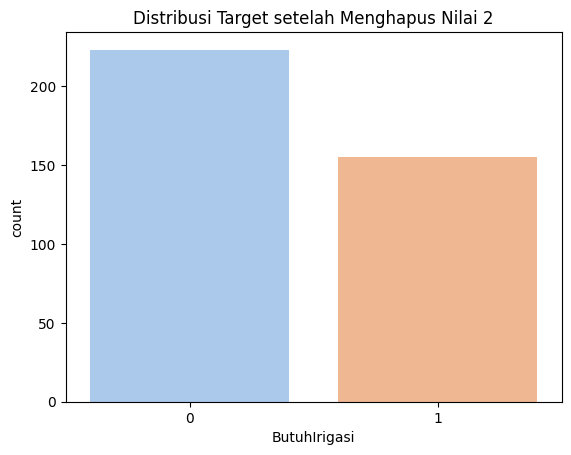

In [ ]:
# Menghapus baris dengan nilai 2 pada kolom 'ButuhIrigasi'
dataset_filter = dataset_bersih[dataset_cleaned['ButuhIrigasi'] != 2]

# Cek distribusi dataset setelah menghapus nilai 2
print(dataset_filter['ButuhIrigasi'].value_counts(normalize=True))

# Visualisasi distribusi target setelah menghapus nilai 2
sns.countplot(x=dataset_filter['ButuhIrigasi'], palette='pastel')
plt.title("Distribusi Target setelah Menghapus Nilai 2")
plt.show()

In [ ]:
# Pisahkan Fitur dan Target
X_test = dataset_filter[['Tipe Tanah', 'Tahap Semai', 'CurahHujan', 'Suhu', 'KelembapanTanah']]  # Fitur
y_test = dataset_filter['ButuhIrigasi']  # Target

# Prediksi menggunakan model yang sudah dilatih
y_pred_test = model.predict(X_test)

# Evaluasi Akurasi untuk Testing Data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on Testing Data: {accuracy_test * 100:.2f}%")

# Classification Report untuk Test Data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

Accuracy on Testing Data: 98.68%

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       223
           1       0.99      0.97      0.98       155

    accuracy                           0.99       378
   macro avg       0.99      0.98      0.99       378
weighted avg       0.99      0.99      0.99       378



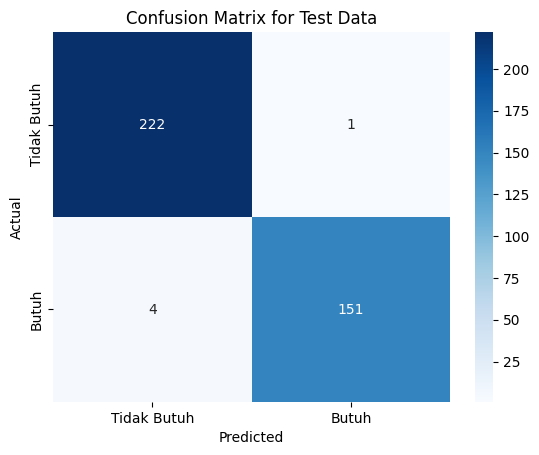

In [ ]:
# Visualisasi Confusion Matrix untuk Test Data
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Butuh', 'Butuh'], yticklabels=['Tidak Butuh', 'Butuh'])
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Add prediction results to the dataset
dataset_filter['PrediksiButuhIrigasi'] = y_pred_test


dataset_filter.head()

<ipython-input-25-b2addc98e627>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filter['PrediksiButuhIrigasi'] = y_pred_test


,JenisTanaman,Tipe Tanah,Tahap Semai,KelembapanTanah,Suhu,Kelembapan,ButuhIrigasi,CurahHujan,PrediksiButuhIrigasi
0,2,5.0,3.0,70,42,29.0,1,150.587008,1
1,4,1.0,2.0,41,22,82.0,0,148.339093,0
2,1,5.0,2.0,19,18,86.0,0,177.586179,0
6,4,1.0,4.0,78,16,88.0,0,95.079014,0
7,2,3.0,3.0,28,14,90.0,0,84.797748,0


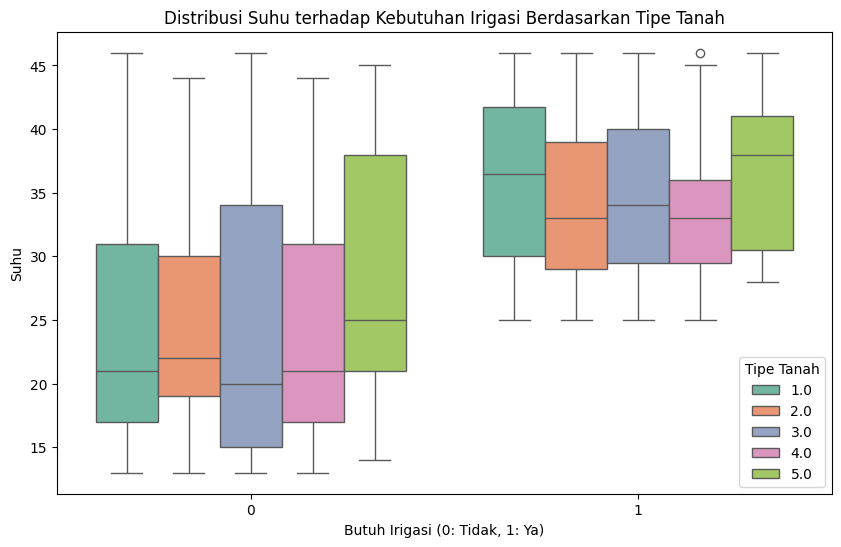

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=dataset_filter,
    x='PrediksiButuhIrigasi',
    y='Suhu',
    hue='Tipe Tanah',
    palette='Set2'
)
plt.title("Distribusi Suhu terhadap Kebutuhan Irigasi Berdasarkan Tipe Tanah")
plt.xlabel("Butuh Irigasi (0: Tidak, 1: Ya)")
plt.ylabel("Suhu")
plt.legend(title="Tipe Tanah")
plt.show()


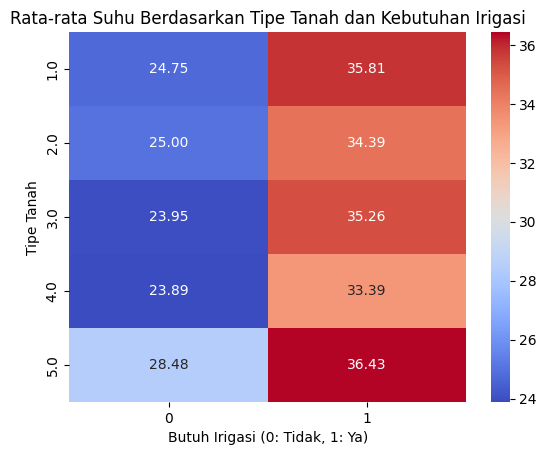

In [ ]:
pivot_table = dataset_filter.pivot_table(
    index='Tipe Tanah',
    columns='PrediksiButuhIrigasi',
    values='Suhu',
    aggfunc='mean'
)
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Rata-rata Suhu Berdasarkan Tipe Tanah dan Kebutuhan Irigasi")
plt.xlabel("Butuh Irigasi (0: Tidak, 1: Ya)")
plt.ylabel("Tipe Tanah")
plt.show()


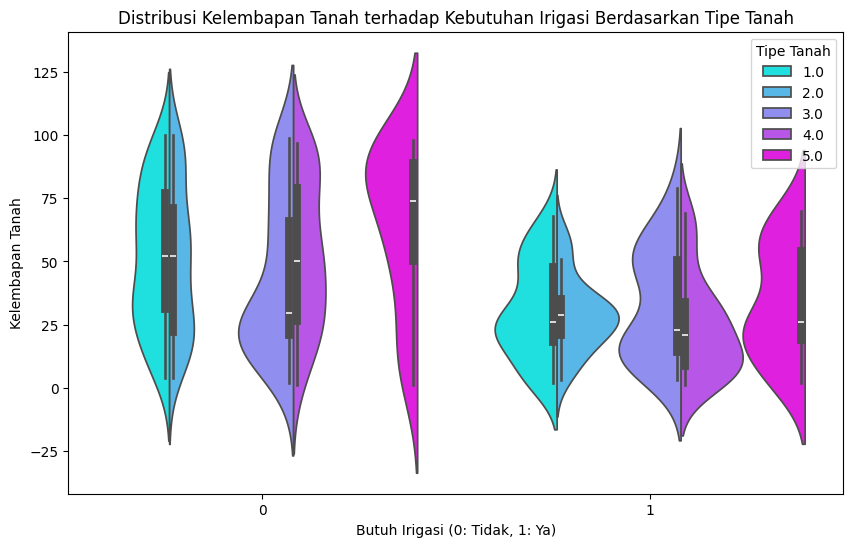

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=dataset_filter,
    x='PrediksiButuhIrigasi',
    y='KelembapanTanah',
    hue='Tipe Tanah',
    split=True,
    palette='cool'
)
plt.title("Distribusi Kelembapan Tanah terhadap Kebutuhan Irigasi Berdasarkan Tipe Tanah")
plt.xlabel("Butuh Irigasi (0: Tidak, 1: Ya)")
plt.ylabel("Kelembapan Tanah")
plt.legend(title="Tipe Tanah")
plt.show()


<ipython-input-30-0fd4e246cd03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset_filter, x='PrediksiButuhIrigasi', y='Suhu', palette='pastel')
<ipython-input-30-0fd4e246cd03>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset_filter, x='PrediksiButuhIrigasi', y='CurahHujan', palette='pastel')
<ipython-input-30-0fd4e246cd03>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset_filter, x='PrediksiButuhIrigasi', y='KelembapanTanah', palette='pastel')


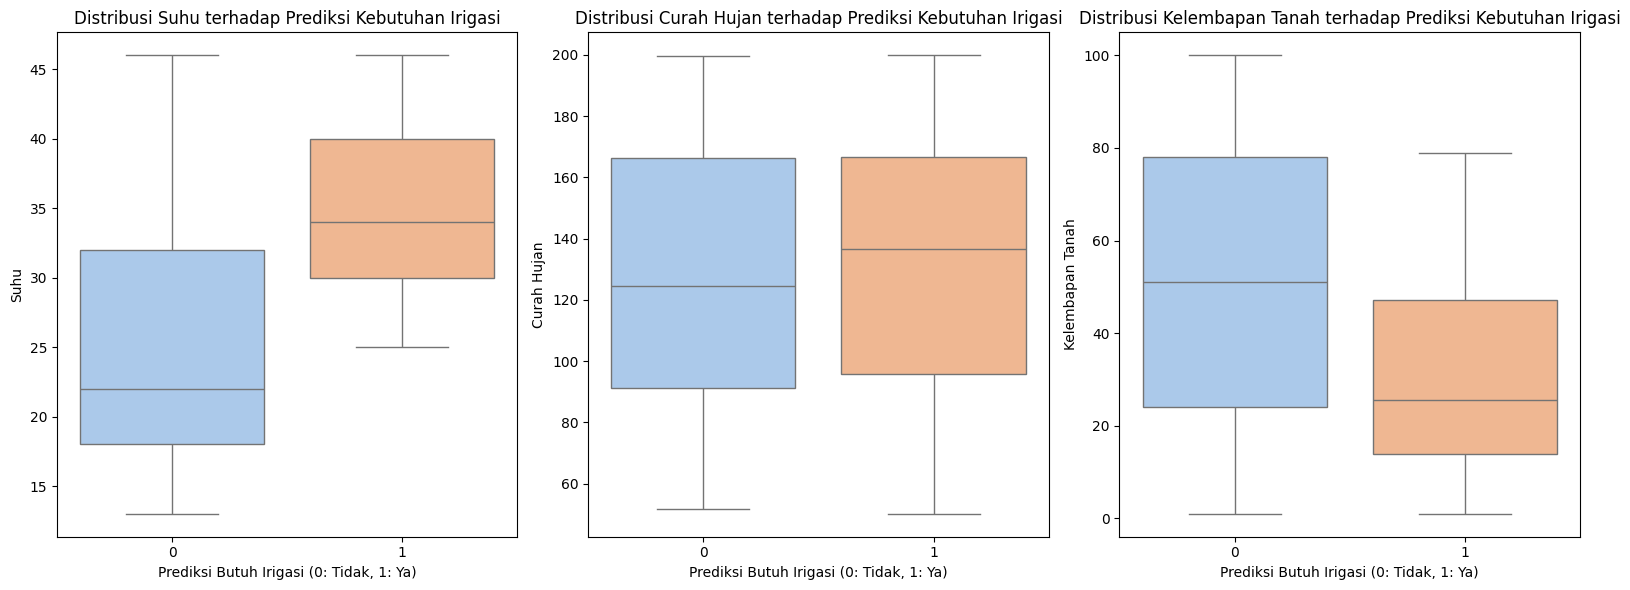

In [ ]:
# Boxplot untuk melihat distribusi fitur terhadap prediksi kebutuhan irigasi
plt.figure(figsize=(16, 6))

# Suhu vs Prediksi
plt.subplot(1, 3, 1)
sns.boxplot(data=dataset_filter, x='PrediksiButuhIrigasi', y='Suhu', palette='pastel')
plt.title('Distribusi Suhu terhadap Prediksi Kebutuhan Irigasi')
plt.xlabel('Prediksi Butuh Irigasi (0: Tidak, 1: Ya)')
plt.ylabel('Suhu')

# Curah Hujan vs Prediksi
plt.subplot(1, 3, 2)
sns.boxplot(data=dataset_filter, x='PrediksiButuhIrigasi', y='CurahHujan', palette='pastel')
plt.title('Distribusi Curah Hujan terhadap Prediksi Kebutuhan Irigasi')
plt.xlabel('Prediksi Butuh Irigasi (0: Tidak, 1: Ya)')
plt.ylabel('Curah Hujan')

# Kelembapan Tanah vs Prediksi
plt.subplot(1, 3, 3)
sns.boxplot(data=dataset_filter, x='PrediksiButuhIrigasi', y='KelembapanTanah', palette='pastel')
plt.title('Distribusi Kelembapan Tanah terhadap Prediksi Kebutuhan Irigasi')
plt.xlabel('Prediksi Butuh Irigasi (0: Tidak, 1: Ya)')
plt.ylabel('Kelembapan Tanah')

plt.tight_layout()
plt.show()


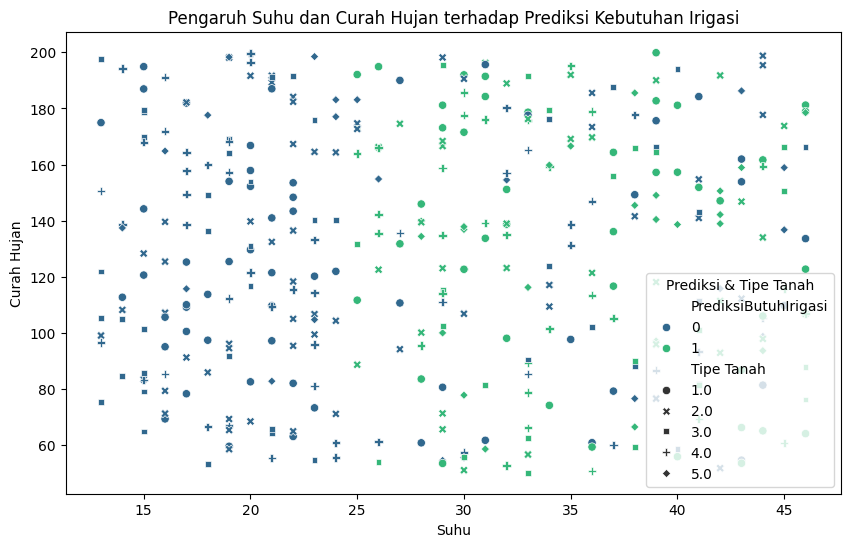

In [ ]:
# Scatterplot untuk Suhu dan Curah Hujan berdasarkan Prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataset_filter,
    x='Suhu',
    y='CurahHujan',
    hue='PrediksiButuhIrigasi',
    style='Tipe Tanah',
    palette='viridis'
)
plt.title("Pengaruh Suhu dan Curah Hujan terhadap Prediksi Kebutuhan Irigasi")
plt.xlabel("Suhu")
plt.ylabel("Curah Hujan")
plt.legend(title="Prediksi & Tipe Tanah")
plt.show()
